Tutorial 8: Results
===================

Once a phase has completed running, it results a `Result` object, which in the previous tutorials we used to plot
the maximum log likelihood fit of the modoel-fits. Lets take a more detailed look at what else the results contains.

In [1]:
#%matplotlib inline
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt
import autofit as af

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


Lets reperform the model-fit from tutorial 1 to get a results object, provided you didn`t delete the results on
your hard-disk this should simply reload them into this Pythons script.

In [2]:
dataset_name = "mass_sis__source_sersic"
dataset_path = path.join("dataset", "imaging", "no_lens_light", dataset_name)

imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    pixel_scales=0.1,
)

mask = al.Mask2D.circular(
    shape_native=imaging.shape_native, pixel_scales=imaging.pixel_scales, radius=3.0
)

phase = al.PhaseImaging(
    search=af.DynestyStatic(
        path_prefix="howtolens", name="phase_t1_non_linear_search", n_live_points=40
    ),
    settings=al.SettingsPhaseImaging(
        settings_masked_imaging=al.SettingsMaskedImaging(
            grid_class=al.Grid2D, sub_size=2
        )
    ),
    galaxies=af.CollectionPriorModel(
        lens_galaxy=al.GalaxyModel(redshift=0.5, mass=al.mp.SphericalIsothermal),
        source_galaxy=al.GalaxyModel(redshift=1.0, bulge=al.lp.SphericalExponential),
    ),
)

result = phase.run(dataset=imaging, mask=mask)

INFO:root:phase_t1_non_linear_search already completed, skipping non-linear search.


In the previous tutorials, we saw that this result contains the maximum log likelihood tracer and fit, which provide
a fast way to visualize the result.

(Uncomment the line below to plot the tracer).

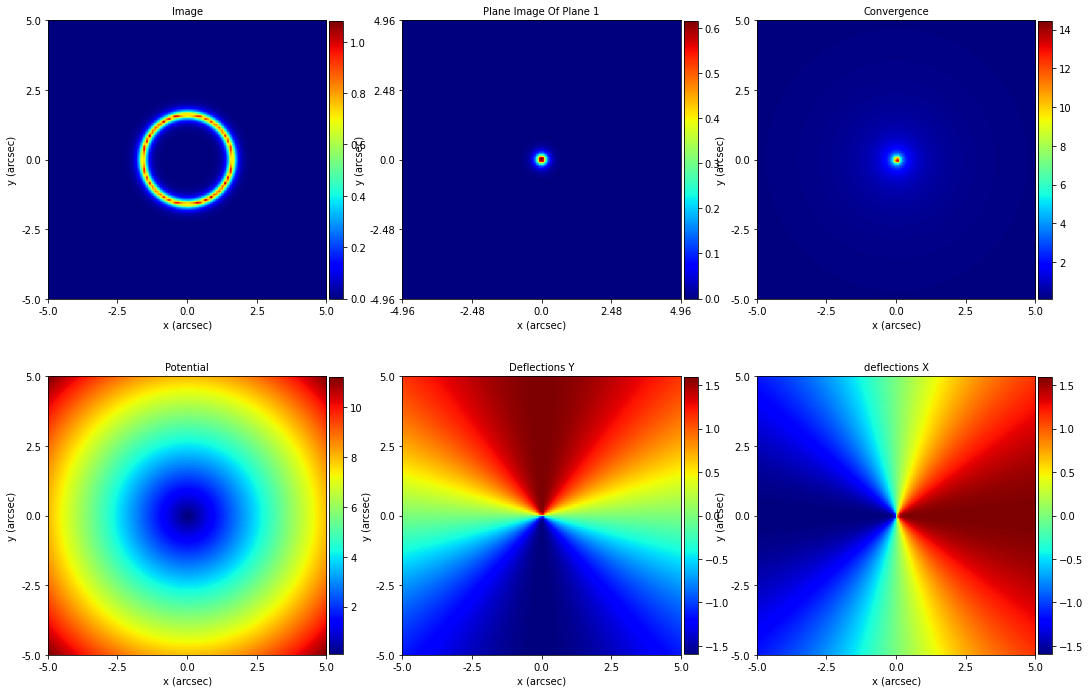

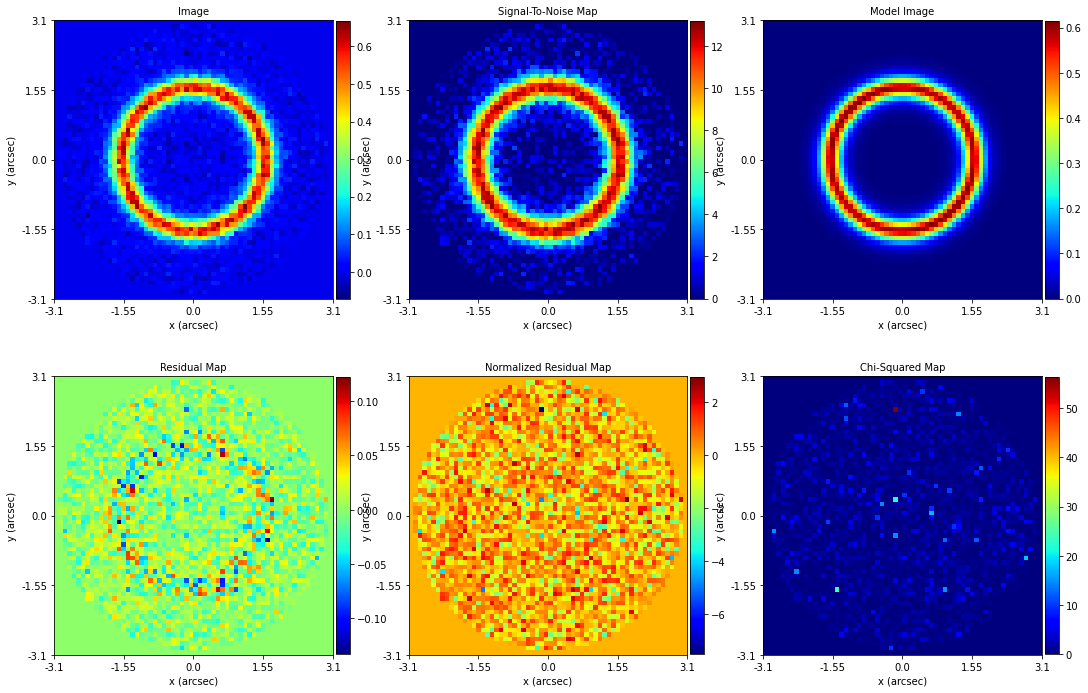

In [3]:
tracer_plotter = aplt.TracerPlotter(
    tracer=result.max_log_likelihood_tracer, grid=mask.unmasked_grid_sub_1
)
tracer_plotter.subplot_tracer()

fit_imaging_plotter = aplt.FitImagingPlotter(fit=result.max_log_likelihood_fit)
fit_imaging_plotter.subplot_fit_imaging()

The result contains a lot more information about the model-fit. For example, its `Samples` object contains the complete
set of `NonLinearSearch` samples, for example every set of parameters evaluated, their log likelihoods and so on,
which are used for computing information about the model-fit such as the error on every parameter.

In [4]:
print(result.samples)
print("Parameters of 100th Sample:")
print(result.samples.parameters[99][:])
print("Log Likelihood of 100th Sample:")
print(result.samples.log_likelihoods[99])

Parameters of 100th Sample:
[0.1064679466850811, -0.10166357924478199, 1.1305960231323167, 0.1157626387920992, 0.4973889664936681, 193.68041277574403, 0.0013396493057857206]
Log Likelihood of 100th Sample:
-21399.451821975872


However, we are not going into any more detail on the result variable in this tutorial, or in the **HowToLens** lectures.

A comprehensive description of the results can be found at the following script:

 `autolens_workspace/notebooks/modeling/result.py`


__Aggregator__

Once a phase has completed running, we have a set of results on our hard disk we manually inspect and analyse. 
Alternatively, we can return the results from the phase.run() method and manipulate them in a Python script.  

However, imagine your dataset is large and consists of many images of strong lenses. You analyse each image 
individually using the same phase, producing a large set of results on your hard disk corresponding to the full sample.
That will be a lot of paths and directories to navigate! At some point, there`ll be too many results for it to be
a sensible use of your time to analyse the results by sifting through the outputs on your hard disk.

PyAutoFit`s aggregator tool allows us to load results in a Python script or, more impotantly, a Jupyter notebook.
All we have to do is point the aggregator to the output directory from which we want to load results, which in this c
ase will be the results of the first `NonLinearSearch` of this chapter.

To set up the aggregator we simply pass it the folder of the results we want to load.

In [5]:
agg = af.Aggregator(directory="output")
agg = agg.filter(agg.directory.contains("phase_t1_non_linear_search"))

Aggregator loading phases... could take some time.

 A total of 175 phases and results were found.
Filter found a total of 1 results


We get the output of the results of the model-fit performed in tutorial 1, given that is the directory we point too. 
This gives us a list with 1 entry, the list would have more entries if there were more results in the path.

In [6]:
samples = list(agg.values("samples"))

From here, we can inspect results as we please, for example printing the maximum log likelihood model of the phase.

In [7]:
print(samples[0].max_log_likelihood_vector)

[-0.010174534835519984, 0.011610391931786713, 1.5991876121616464, 0.0026238118526152026, 0.0005606672884674352, 0.20760303461764798, 0.19312621986547815]


Again, we won't go into any more detail on the aggregator in this tutorial. For those of you modeling large samples of
lenses for who the tool will prove useful, checkout the full set of aggregator tutorials which can be found at the 
location `autolens_workspace/advanced`aggregator`. Here, you'll learn how to:

 - Use the aggregator to filter out results given a phase name or input string.
 - Use the Samples to produce many different results from the fit, including error estimates on parameters and 
      plots of the probability density function of parameters in 1D and 2D.
 - Reproduce visualizations of results, such as a tracer`s images or the fit to a lens dataset.

Even if you are only modeling a small sample of lenses, if you anticipate using **PyAutoLens** for the long-term I 
strongly recommend you begin using the aggregator to inspect and analyse your result. This is because it makes it 
simple to perform all analyse in a Jupyter notebook, which as you already know is a flexible and versatile way to check 
results and make figures.

In HowToLelens, the main purpose of this tutorial was to make sure that you are aware of the aggregator`s existance, 
and now you are!